<a href="https://colab.research.google.com/github/garfield-gray/NeuralNetwork/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

import sklearn as sl
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb


# problem 2

In [ ]:
d = datasets.load_breast_cancer()
x = d.data
y = d.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (455, 30)
Size of the training set: 455
Shape of the testing set: (114, 30)
Size of the testing set: 114


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


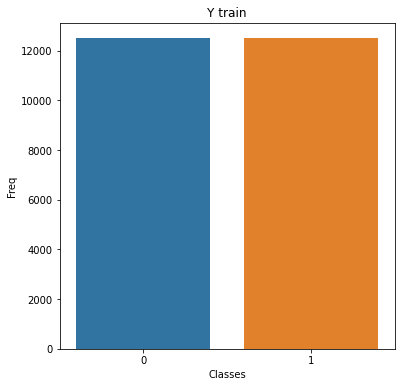

In [ ]:
plt.figure(figsize = (6,6))
sb.countplot(y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32 ,activation='relu',input_shape=(30,)),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def L(epoch , Ir):
  if epoch < 2:
    return Ir
  else:
    return Ir*np.exp(-0.2)
  
E = tf.keras.callbacks.EarlyStopping(patience=3 , monitor = 'val_acc')
L = tf.keras.callbacks.LearningRateScheduler(L)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train , validation_split=0.1,epochs=100,batch_size=32, callbacks=[E, L])

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 2.2936 - accuracy: 0.6993 - val_loss: 1.6019 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.8778 - val_loss: 0.7831 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5346 - accuracy: 0.8949 - val_loss: 0.5863 - val_accuracy: 0.8913 - lr: 8.1873e-04
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3537 - accuracy: 0.9169 - val_loss: 0.6286 - val_accuracy: 0.8478 - lr: 6.7032e-04
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3455 - accuracy: 0.9144 - val_loss: 0.3807 - val_accuracy: 0.8913 - lr: 5.4881e-04
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.9144 - val_loss: 0.3544 - val_accuracy: 0.8913 - lr: 4.4933e-04
Epoch 7/100
13/13 [==============================] - 0s 6ms

In [ ]:
y_pred_float = model.predict_step(x_test)  
y_pred = np.round(y_pred_float)

In [ ]:
target_list=['benign','malignant']
sl.metrics.classification_report(y_true=y_test,y_pred=y_pred,output_dict = True,target_names=target_list)

{'accuracy': 0.9298245614035088,
 'benign': {'f1-score': 0.9130434782608695,
  'precision': 0.9333333333333333,
  'recall': 0.8936170212765957,
  'support': 47},
 'macro avg': {'f1-score': 0.9271099744245523,
  'precision': 0.9304347826086956,
  'recall': 0.9244204509368052,
  'support': 114},
 'malignant': {'f1-score': 0.9411764705882353,
  'precision': 0.927536231884058,
  'recall': 0.9552238805970149,
  'support': 67},
 'weighted avg': {'f1-score': 0.9295777807690582,
  'precision': 0.9299262649377066,
  'recall': 0.9298245614035088,
  'support': 114}}

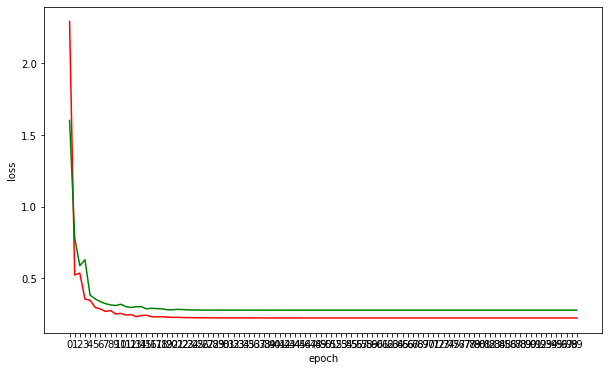

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'train', color='r')
plt.plot(history.history['val_loss'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(0, 100, 1))
plt.show()

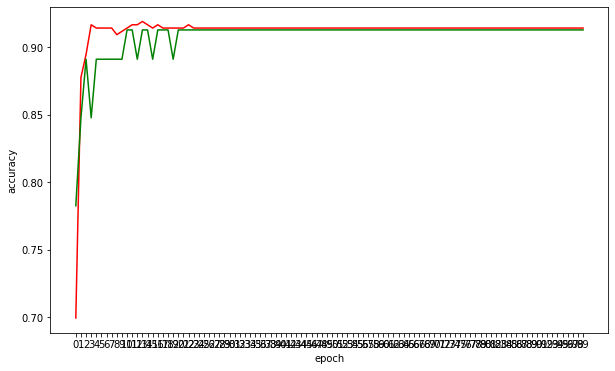

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'train', color='r')
plt.plot(history.history['val_accuracy'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 100, 1))
plt.show()

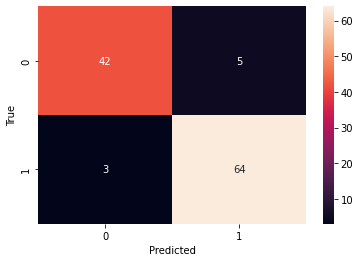

In [ ]:
CM = sl.metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# problem 3

In [2]:
(X_train,Y_train), (X_test, Y_test) = tf.keras.datasets.imdb.load_data(num_words = 15000)

17473536/17464789 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


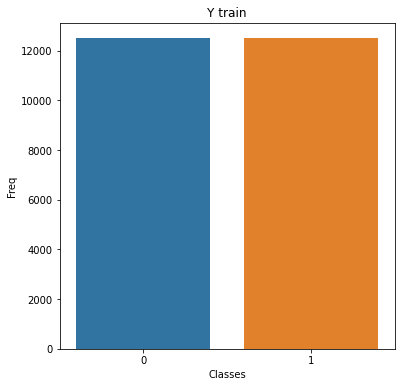

In [3]:
plt.figure(figsize = (6,6))
sb.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense, Activation
from keras.preprocessing.sequence import pad_sequences

In [6]:
X_train = pad_sequences(X_train, maxlen = 130)
X_test = pad_sequences(X_test, maxlen = 130)

print(X_train[5])

for i in X_train[0:10]:
    print(len(i))
    

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
130
130
130
130
130
130
130
130
130
130


we wanna define what these numbers mean in terms of words

In [10]:
word_index = tf.keras.datasets.imdb.get_word_index()
def whatItSay(index = 24):
    
    reverse_index = dict([(value,key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

1654784/1641221 [==============================] - 0s 0us/step


In [13]:
decoded_review = whatItSay(7)

got a very middle class suburban setting there's zero atmosphere or mood there's a lesbian suggest incestuous kiss but the hamiltons is low on the exploitation scale there's not much here for the horror crowd br br filmed in ! in california this has that modern low budget look about it it's not badly made but rather forgettable the acting by an unknown to me cast is nothing to write home about i can't say i ever felt anything for anyone br br the hamiltons commits the cardinal sin of being both dull boring from which it never ! add to that an ultra thin story no gore a rubbish ending character's who you don't give a toss about you have a film that did not impress me at all
0


In [14]:
decoded_review = whatItSay(3)

! as he lives the story of his own life br br ! the ! pinnacle is probably the most honest unpretentious and genuinely beautiful film of scotland ever made like ! i got slightly annoyed with the pretext of hanging stories on more stories but also like ! i ! this once i saw the ! picture ' forget the box office pastiche of braveheart and its like you might even ! the ! famous ! of the wicker man to see a film that is true to scotland this one is probably unique if you maybe ! on it deeply enough you might even re evaluate the power of storytelling and the age old question of whether there are some truths that cannot be told but only experienced
1


In [15]:
rnn = Sequential()
rnn.add(Embedding(15000, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (15000, 130), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
X_train = pad_sequences(X_train, maxlen = 130)
X_test = pad_sequences(X_test, maxlen = 130)

In [20]:
history = rnn.fit(X_train, Y_train, validation_split=0.1,epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
176/176 [==============================] - 7s 40ms/step - loss: 0.0425 - accuracy: 0.9852 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 2/20
176/176 [==============================] - 7s 40ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.1978 - val_accuracy: 0.9384
Epoch 3/20
176/176 [==============================] - 7s 39ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.0986 - val_accuracy: 0.9676
Epoch 4/20
176/176 [==============================] - 7s 39ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0955 - val_accuracy: 0.9668
Epoch 5/20
176/176 [==============================] - 7s 38ms/step - loss: 0.0279 - accuracy: 0.9906 - val_loss: 0.1219 - val_accuracy: 0.9628
Epoch 6/20
176/176 [==============================] - 7s 41ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.1410 - val_accuracy: 0.9576
Epoch 7/20
176/176 [==============================] - 7s 39ms/step - loss: 0.0251 - accuracy: 0.9930 - val_loss: 0.1566 - val_accuracy: 0.9540

In [21]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %",score[1]*100)

782/782 [==============================] - 6s 8ms/step - loss: 1.1571 - accuracy: 0.8264
Accuracy: % 82.63599872589111


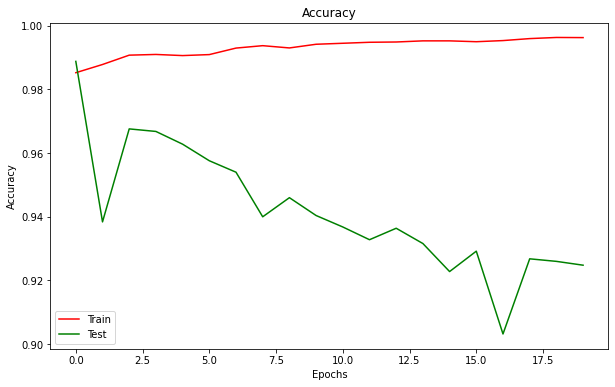

In [22]:
plt.figure(figsize=(10,6))
plt.plot(history.history["accuracy"], label = "Train", color = 'r')
plt.plot(history.history["val_accuracy"], label = "Test", color = 'g')
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

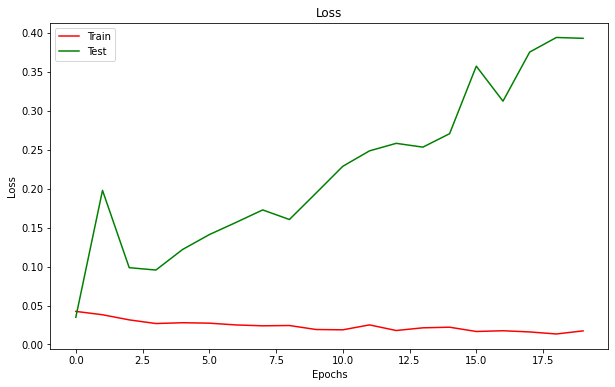

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"], label = "Train", color = 'r')
plt.plot(history.history["val_loss"], label = "Test", color = 'g')
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [28]:
y_pred_float = rnn.predict(X_test)
y_pred = np.round(y_pred_float)

In [29]:
y_pred.shape

(25000, 1)

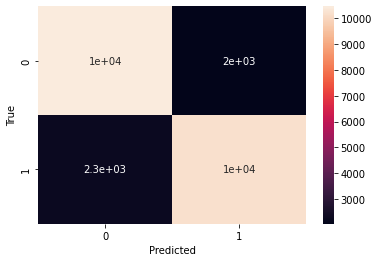

In [31]:
CM = sl.metrics.confusion_matrix(y_true=Y_test,y_pred=y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()